# Lesson: Anomaly Detection - DENSITY-BASED CLUSTERING

<a href = "https://www.canva.com/design/DAFlotxVbWc/Ok6O4AHmRQ0sd31DKXUaug/view?utm_content=DAFlotxVbWc&utm_campaign=designshare&utm_medium=link&utm_source=publishsharelink">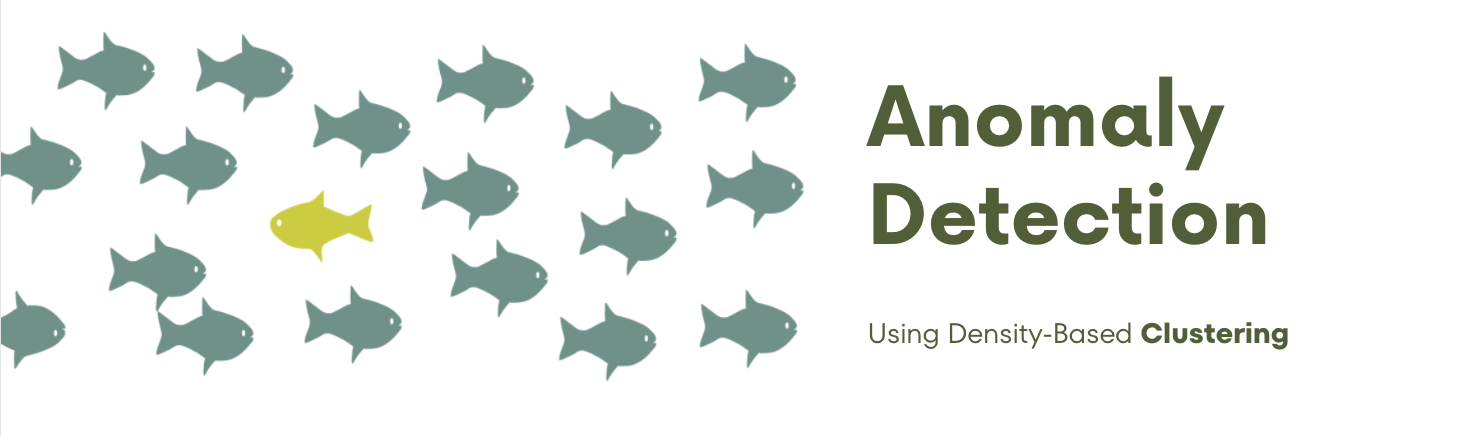</a>

<hr style="border:2px solid gray">

- Assumption: Data points that are similar tend to belong to similar groups or clusters, as determined by their distance from local centroids. Normal data points occur around a dense neighborhood and abnormalities are far away.

- Using density based clustering, like DBSCAN, we can design the model such that the data points that do not fall into a cluster are the anomalies.

# Steps
1. Select variables you want to cluster: 
> `df = df[["col1", "col2"]]`

2. Convert to array & dtype float: 
> `np_array = df.values.astype("float32", copy = False)`

3. Scale to standard normal:
> `scaler = StandardScaler().fit(np_array) np_array = scaler.transform(np_array)`

4. Create DBSCAN object and fit: 
> `dbsc = DBSCAN(eps = .75, min_samples = 15).fit(np_array)`

5. Extract labels: 
> `labels = dbsc.labels_`

6. Add labels back to original dataframe:
> `df['labels'] = labels`

7. Explore:
> `df.labels.value_counts() sns.scatterplot(df.col1, df.col2, hue=df.labels)`

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os
import itertools


# DBSCAN import
from sklearn.cluster import DBSCAN

# Scaler import
from sklearn.preprocessing import MinMaxScaler


# Acquire

In [ ]:
def get_connection_url(db, username=os.getenv('sqlUSER'), host=os.getenv('sqlHOST'), password=os.getenv('sqlPSWD')):
    """
    This function will:
    - take username, pswd, host credentials from imported env module
    - output a formatted connection_url
    """
    return f'mysql+pymysql://{username}:{password}@{host}/{db}'


In [2]:
from env import host, user, password

def get_connection_url(database, host=host, user=user, password=password):
    return f'mysql+pymysql://{user}:{password}@{host}/{database}'

In [ ]:
url = get_connection_url("grocery_db")

sql = """
select *
from grocery_customers
"""

df = pd.read_sql(sql, url, index_col="customer_id")
df.head()

In [ ]:
df.info()

___

# Follow the Steps

# Step 1: Select variables you want to cluster

In [ ]:
# Cluster on all or a selected subset of features


# Step 2: Convert to array & dtype float

In [ ]:
df.info()

In [ ]:
#convert to an array and turn into float
np_array = 

# Step 3: Scale to standard normal

In [ ]:
# MAKE the scaler

# FIT/transform the scaler


gmf_scaled

In [ ]:
# Now, let's add the scaled value columns back onto the dataframe
scaled_columns = 

In [ ]:
# Save a copy of the original dataframe
original_df = df.copy()

In [ ]:
# Create a dataframe containing the scaled array of values
scaled_df = 

In [ ]:
scaled_df

In [ ]:
df.merge()

In [ ]:
# Merge the scaled and non-scaled values into one dataframe
df = 
df = 

In [ ]:
df.head()

# Step 4: Create <a href="https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html">DBSCAN</a> object and fit

#### Construct a DBSCAN object that requires a **minimum of 20 data points** in a neighborhood of **radius 0.1** to be considered a core point.

In [ ]:
# Make the object
dbsc = 

# Fit the object


# Step 5: Extract labels


**NOTE:**
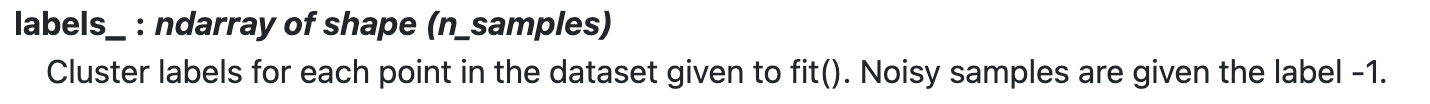

In [ ]:
dbsc.labels_

# Step 6: Add labels back to original dataframe

In [ ]:
# Assign the cluster labels
df['gmf_labels'] = 

In [ ]:
#see what this dataframe looks like
df.sample(5)

# Step 7: Explore

<div class="alert alert-block alert-info">
<b>Remember:</b> 
<br>
    
- <b>-1</b>: refers to data that does <u>not</u> fall into a cluster
- <b>0</b>: refers to data that does fall into a cluster
</div>

In [ ]:
#let's see what labels holds


In [ ]:
df.head()

In [ ]:
combination[0]

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

    
# Create a figure with a size of 8x8
fig = plt.figure(1, figsize=(8, 8))

# Create a 3D axes object with specified rect, elevation, and azimuth
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

# Plot the points using the Fresh, Milk, and Grocery columns from the DataFrame
# Color the points based on the gmf_labels column and add black edges
ax.scatter(df.Fresh, df.Milk, df.Grocery, c=df.gmf_labels, edgecolor='k')

# Remove tick labels for the x-axis, y-axis, and z-axis
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

# Set labels for the x-axis, y-axis, and z-axis
ax.set_xlabel('Fresh')
ax.set_ylabel('Milk')
ax.set_zlabel('Grocery')

# Display the plot
plt.show()


# Exercises:

file name: `clustering_anomaly_detection.py` or `clustering_anomaly_detection.ipynb`

### Clustering - DBSCAN

### 1. Use DBSCAN to detect anomalies in other products from the `customers` dataset. The database name is `grocery_db`.

### 2. Use DBSCAN to detect anomalies in requests from the curriculum access logs in the `curriculum_logs` database.

### 3. Use DBSCAN to detect anomalies in number of bedrooms and finished square feet of property for the filtered dataset you used in the <a href="https://ds.codeup.com/clustering/explore/#exercises">clustering evaluation exercises</a> (single unit properties with a logerror).